# Advancing Rare-Earth Separation by Machine Learning


Liu, T., Johnson, K.R., Jansone-Popova, S. and Jiang, D.E., 2022. Advancing Rare-Earth Separation by Machine Learning. JACS Au, 2(6), pp.1428-1434.


## Table of content

* Load dataset
* Data preparation
* Build and train the model
* Evaluate the model
* Inference

# Load dataset

In [4]:
# import packages
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

print("tf version: ", tf.__version__)
print("keras version: ", keras.__version__)
print("np version: ", np.__version__)
print("matplotlib version: ", matplotlib.__version__)
print("pd version: ", pd.__version__)

tf version:  2.17.0
keras version:  3.4.1
np version:  1.26.4
plt version:  3.8.0
pd version:  2.1.4


In [6]:
# Read the excel file
Training_Dataset = pd.read_excel("au2c00122_si_002.xlsx", sheet_name='training set')
Validation_Dataset = pd.read_excel("au2c00122_si_002.xlsx", sheet_name='validation set')

Validation_Dataset.head()

,ECFP-1,ECFP-2,ECFP-3,ECFP-4,ECFP-5,ECFP-6,ECFP-7,ECFP-8,ECFP-9,ECFP-10,...,Second IE_metal (kJ/mol),Third IE_metal (kJ/mol),Electron Affinity_metal (kJ/mol),Atomic Radius_metal,Covalent Radius_metal,Pauling EN_metal,Ionic Radius_metal,Standard Entropy_metal (J/mol.K),log_D,reference
0,0,0,0,0,0,0,0,0,0,0,...,1341.1,2022.3,32.8,2.24,1.74,1.00,0.861,51.0,0.342423,1
1,0,0,0,0,0,0,0,0,0,0,...,1068.1,2257.8,15.6,2.36,1.85,1.17,0.958,69.5,0.505150,1
2,0,0,0,0,0,0,0,0,0,0,...,1166.5,1990.5,13.2,2.34,1.82,1.20,0.938,67.9,0.230449,1
3,0,0,0,0,0,0,0,0,0,0,...,1034.3,2132.3,184.9,2.39,1.88,1.14,0.983,71.1,0.041393,1
4,0,0,0,0,0,0,0,0,0,0,...,1034.3,2132.3,184.9,2.39,1.88,1.14,0.983,71.1,1.344392,2


# Data preparation

In [7]:
X_Train = Training_Dataset.iloc[:, 0:2291]
y_train = Training_Dataset.iloc[:, 2291]
X_Validation = Validation_Dataset.iloc[:, 0:2291]
y_Validation = Validation_Dataset.iloc[:, 2291]

X_Train.head()

,ECFP-1,ECFP-2,ECFP-3,ECFP-4,ECFP-5,ECFP-6,ECFP-7,ECFP-8,ECFP-9,ECFP-10,...,Density_metal (g/cm3),First IE_metal (kJ/mol),Second IE_metal (kJ/mol),Third IE_metal (kJ/mol),Electron Affinity_metal (kJ/mol),Atomic Radius_metal,Covalent Radius_metal,Pauling EN_metal,Ionic Radius_metal,Standard Entropy_metal (J/mol.K)
0,0,0,0,0,0,0,0,0,0,0,...,6.16,538.1,1067.0,1850.3,48.0,1.87,2.08,1.10,1.030,56.9
1,0,0,0,0,0,0,0,0,0,0,...,6.77,534.4,1046.9,1948.8,55.0,2.42,1.84,1.12,1.020,72.0
2,0,0,0,0,0,0,0,0,0,0,...,6.77,528.1,1017.9,2086.4,92.8,2.40,1.90,1.13,0.990,73.9
3,0,0,0,0,0,0,0,0,0,0,...,7.01,533.1,1034.3,2132.3,184.9,2.39,1.88,1.14,0.983,71.1
4,0,0,0,0,0,0,0,0,0,0,...,7.52,544.5,1068.1,2257.8,15.6,2.36,1.85,1.17,0.958,69.5


In [8]:
X_Train_arr = X_Train.to_numpy()
y_Train_arr = y_train.to_numpy()
X_Validation_arr = X_Validation.to_numpy()
y_Validation_arr = y_Validation.to_numpy()

X_Train_arr[0]

array([ 0.  ,  0.  ,  0.  , ...,  1.1 ,  1.03, 56.9 ])

In [9]:
y_Train_arr[0]

0.477121255

In [10]:
y_Train_arr.shape

(1085,)

# Build and train the model

In [11]:
# Build the model (sequential)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[2291]))
model.add(keras.layers.Dense(512, activation="relu", kernel_initializer='normal', kernel_regularizer='l2'))
model.add(keras.layers.Dense(128, activation="relu", kernel_initializer='normal', kernel_regularizer='l2'))
model.add(keras.layers.Dense(16, activation="relu", kernel_initializer='normal', kernel_regularizer='l2'))
#model.add(keras.layers.Dense(1, activation="softmax", kernel_initializer='normal'))
model.add(keras.layers.Dense(1, kernel_initializer='normal'))

C:\Users\26070\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# Compile the model
opt = keras.optimizers.SGD(learning_rate=0.00001)  # learning rate can be changed to increase the performance of the model
#model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
#metrics = keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None)
#model.compile(loss="mean_absolute_error", optimizer=opt, metrics=["mean_squared_error"])
model.compile(loss="mean_absolute_error", optimizer=opt, metrics=[keras.metrics.RootMeanSquaredError()])

Then we will start to train the model by calling model.fit() and save the model by calling model.save(). More information about these two functions are in the Keras doc: https://keras.io/api/models/.

In [13]:
# Train the model
history = model.fit(X_Train_arr, y_Train_arr, epochs=5000, validation_data=[X_Validation_arr, y_Validation_arr])

Epoch 1/5000
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 33.3424 - root_mean_squared_error: 2.8586 - val_loss: 32.5498 - val_root_mean_squared_error: 1.9509
Epoch 2/5000
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 32.5285 - root_mean_squared_error: 1.8424 - val_loss: 32.3879 - val_root_mean_squared_error: 1.6439
Epoch 3/5000
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 32.3804 - root_mean_squared_error: 1.6664 - val_loss: 32.2840 - val_root_mean_squared_error: 1.5198
Epoch 4/5000
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 32.2946 - root_mean_squared_error: 1.5905 - val_loss: 32.1418 - val_root_mean_squared_error: 1.4305
Epoch 5/5000
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 32.1284 - root_mean_squared_error: 1.3938 - val_loss: 32.0908 - val_root_mean_squared_error: 1.3093
Epoch 6/5000
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 32.0410 - root_mean_squared_error: 1.3096 - val_loss: 31.9756 - val_root_mean_squared_error: 1.2237
Epoch 7/5000
34/34 ━━━━━━━━━━━━━━━

KeyboardInterrupt: 

# Evaluate the model

In [ ]:
# visualize the model structure with model.summary(). Feel free to comment out the code below to visualize the model structure

# model.summary()

The test dataset is not used for training and validation, which means the images are new to the trained model. We will use it to get the performance of the model. The performance is acceptable because the accuracy for the test dataset is nearly the same as the accuracy for the train and validation dataset.

In [ ]:
# Using test dataset to evaluate loss and accuracy for trained model
results = model.evaluate(X_Train_arr, y_Train_arr, batch_size=128)

9/9 [==============================] - 0s 3ms/step - loss: 31.2576 - root_mean_squared_error: 0.9473


At the end of epoch, the accuary of trainning dataset and validation dataset should be close. This is an easy way to determine if there is overfitting or not.

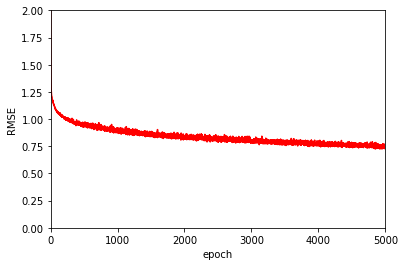

In [ ]:
# plot accuracy vs epoch
plt.plot(history.history['root_mean_squared_error'],'r')
#plt.plot(history.history['val_accuracy'])
#plt.title('model accuracy')
plt.ylabel('RMSE')
plt.xlabel('epoch')
#plt.legend(['train', 'validation'], loc='upper left')
plt.xlim([0, 5000])
plt.ylim([0, 2])
plt.show()

# Inference

In [ ]:
# Visualize one image, X_test[x]. Here we choose X_test[1]. You can choose any of the images among all test dataset (10,000 images)
# from keras.applications.imagenet_utils import decode_predictions
# from keras.preprocessing import image

# inference_image_number = 1  # Choose the number from 0-9,999 (amount of test dataset)!
# img1 = X_Train_arr[inference_image_number]
# img1

In [ ]:
# x = np.squeeze(X_Train_arr[inference_image_number])
# x = np.expand_dims(x, axis=0)

# # predict the X_test[1] with model.predict()
# y_pred = model.predict(x)
# print("val for each of the catogaries: ", y_pred)


In [ ]:
# Visualize one image, X_test[x]. Here we choose X_test[1]. You can choose any of the images among all test dataset (10,000 images)
# from keras.applications.imagenet_utils import decode_predictions
# from keras.preprocessing import image

# inference_image_number = 1  # Choose the number from 0-9,999 (amount of test dataset)!
# img1 = X_test[inference_image_number]
# plt.imshow(img1)

In [ ]:
# class_label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# # image process
# x = np.squeeze(X_test_norm[inference_image_number])
# x = np.expand_dims(x, axis=0)

# # predict the X_test[1] with model.predict()
# y_prob = model.predict(x)
# print("probability for each of the catogaries: ", y_prob)
# y_class = y_prob.argmax(axis=-1)
# # print("cloth index", y_class)
# print("cloth catogaries the model predict: ", class_label[y_class[0]])